In [48]:
# in this we will be having softmax output, ie, multiclass classification problem
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [49]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [50]:
len(X_train)

60000

In [51]:
len(y_test)

10000

In [71]:
X_train = X_train / 255
X_test = X_test /255

In [72]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

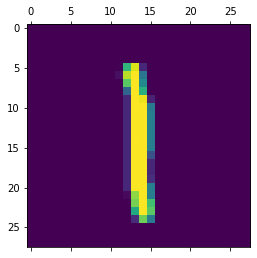

In [73]:
plt.matshow(X_train[14])

In [74]:
#now flatten our training data set to 1D array, to feed as an input layer
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [75]:
y_train[14]

1

In [76]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)
#in this model we have just one layer which is output layer

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4735 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9256


In [77]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2696 - accuracy: 0.9239


[0.2695755064487457, 0.9239000082015991]

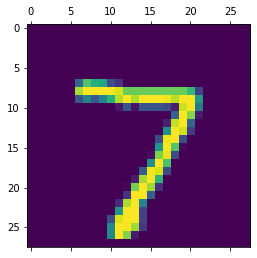

In [78]:
plt.matshow(X_test[0])

In [79]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 981us/step


In [80]:
y_predicted[0]

array([3.99161205e-02, 2.54467011e-07, 4.97553088e-02, 9.59544718e-01,
       4.06874809e-03, 1.07111916e-01, 2.27497367e-06, 9.99857485e-01,
       1.35096133e-01, 7.18104839e-01], dtype=float32)

In [81]:
np.argmax(y_predicted[0])

7

In [82]:
y_predicted_labels=[np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [83]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [86]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
#confusion matrix- used to define performance of a classification algorithm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    6,    3,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   9,    8,  908,   20,   11,    4,   13,   13,   44,    2],
       [   4,    0,   14,  921,    2,   24,    3,   12,   24,    6],
       [   1,    1,    2,    2,  930,    0,   12,    3,    9,   22],
       [  10,    1,    2,   31,   12,  768,   19,    9,   34,    6],
       [  11,    3,    5,    1,    8,   11,  916,    2,    1,    0],
       [   1,    5,   21,    5,    9,    0,    0,  956,    3,   28],
       [   9,    6,    6,   17,    9,   20,   10,   13,  879,    5],
       [  11,    6,    1,   11,   50,    6,    0,   26,    9,  889]])>

Text(69.0, 0.5, 'Truth')

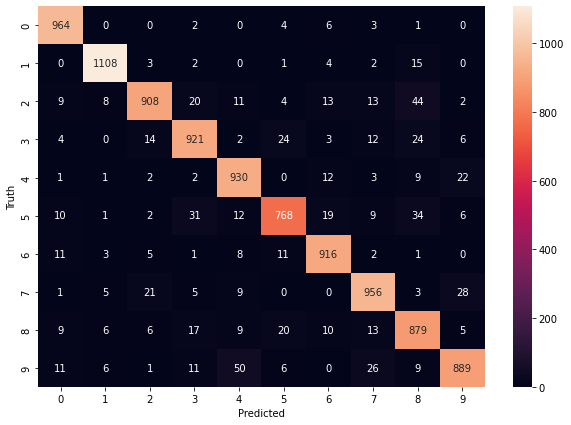

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)
# one hidden layer now added to the ANN MODEL

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2741 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1258 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9834


In [91]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9740


[0.08136546611785889, 0.9739999771118164]

Text(69.0, 0.5, 'Truth')

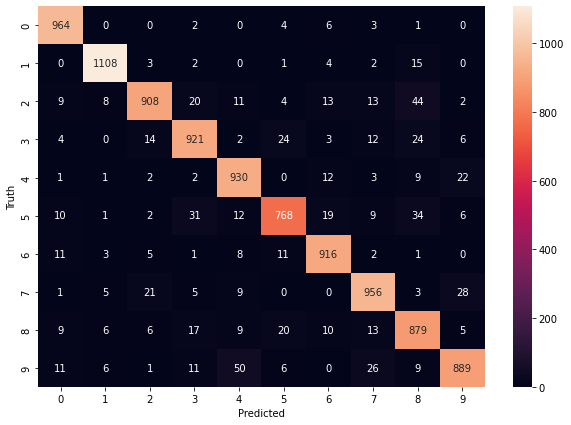

In [92]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)
# we can directly give matrix input and use keras to flatten the input matrix to array

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2704 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0840 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0631 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9852
